In [8]:
import numpy as np
from graphqec import ThresholdLAB, BaseCode
from graphqec.codes.bivariate_bicycle_code_v2 import BivariateBicycleCode

In [9]:
bb = BivariateBicycleCode(
    Lx = 3,
    Ly = 3,
    a1 = 0,
    a2 =1,
    a3 =2,
    b1 =0,
    b2 =1,
    b3 =2,
)

bb.build_memory_circuit(number_of_rounds=3)

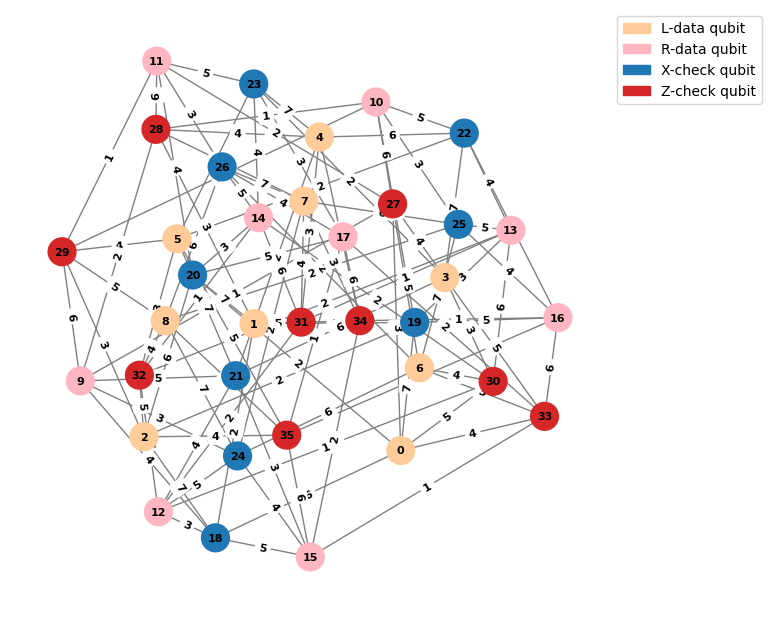

In [3]:
bb.draw_graph()

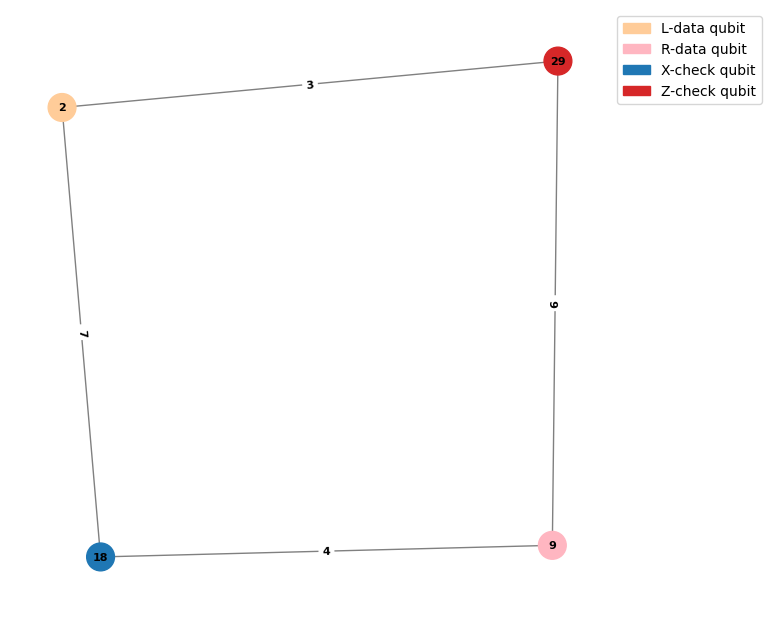

In [4]:
bb = BivariateBicycleCode(
    Lx = 3,
    Ly = 3,
    a1 = 0,
    a2 =1,
    a3 =2,
    b1 =0,
    b2 =1,
    b3 =2,
)

# sub = bb.graph.subgraph([0,1,2,5,8,9,10,11,12,15] + [18] + [29])
sub = bb.graph.subgraph([2,9] + [18] + [29])

bb._graph = sub

bb.draw_graph()


In [5]:
bb.build_memory_circuit(number_of_rounds=2)

In [6]:
bb.memory_circuit.diagram()

q0: ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------OBSERVABLE_INCLUDE:L0*=1---------

 q1: ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 q2: -R-DEPOLARIZE1(0)------------------@-DEPOLARIZE2(0)-----------------------------------X-DEPOLARIZE2(0)--------------------------------------------------------------------------------------------@-DEPOLARIZE2(0)-----------------------------------X-DEPOLARIZE2(0)-------------------------------------------DEPOLARIZE1(0)------------M:rec[5]-DETECTOR:D3=rec[5]*rec[4]*rec[3]-
                                        | |                                                | |                                                                                                         | |                                                | |
 q3: -----------------------------------|-|------------------------------------------------|-|---------------------------------------------------------------------------------------------------------|-|------------------------------------------------|-|----------------------------------------------------------------------------------------------------------------------------
                                        | |                                                | |                                                                                                         | |                                                | |
 q4: -----------------------------------|-|------------------------------------------------|-|---------------------------------------------------------------------------------------------------------|-|------------------------------------------------|-|----------------------------------------------------------------------------------------------------------------------------
                                        | |                                                | |                                                                                                         | |                                                | |
 q5: -----------------------------------|-|------------------------------------------------|-|---------------------------------------------------------------------------------------------------------|-|------------------------------------------------|-|----------------------------------------------------------------------------------------------------------------------------
                                        | |                                                | |                                                                                                         | |                                                | |
 q6: -----------------------------------|-|------------------------------------------------|-|---------------------------------------------------------------------------------------------------------|-|------------------------------------------------|-|----------------------------------------------------------------------------------------------------------------------------
                                        | |                                                | |                                                                                                         | |                                                | |
 q7: -----------------------------------|-|----------------------------------------

In [7]:
num_shots = 1
sampler = bb.memory_circuit.compile_detector_sampler()
detection_events, observable_flips = sampler.sample(
    num_shots, separate_observables=True
)

detector_error_model = bb.memory_circuit.detector_error_model(
    decompose_errors=False
)

ValueError: The circuit contains non-deterministic detectors.

To make an SVG picture of the problem, you can use the python API like this:
    your_circuit.diagram('detslice-with-ops-svg', tick=range(0, 5), filter_coords=['D1', ])
or the command line API like this:
    stim diagram --in your_circuit_file.stim --type detslice-with-ops-svg --tick 0:5 --filter_coords D1 > output_image.svg

This was discovered while analyzing a Z-basis demolition measurement (MR) on:
    qubit 29

The collapse anti-commuted with these detectors/observables:
    D1

The backward-propagating error sensitivity for D1 was:
    X2
    X9
    Z18
    X29

Circuit stack trace:
    at instruction #16 [which is MR 18 29]

In [ ]:
th = ThresholdLAB(
    configurations= [{}],
    code=BivariateBicycleCode,
    error_rates= np.linspace(0, 0.1, 5)
)

th.collect_stats(num_shots=10**1)

In [ ]:
th = ThresholdLAB(
    configurations= [{
        "Lx": 3,
        "Ly": 3,
        "a1": 0,
        "a2": 1,
        "a3": 2,
        "b1": 0,
        "b2": 1,
        "b3": 2,
        }],
    code=BivariateBicycleCode,
    error_rates= np.linspace(0, 0.1, 5)
)

th.collect_stats(num_shots=10**1)

In [ ]:
bb = BivariateBicycleCode(
    **{
        "Lx": 3,
        "Ly": 3,
        "a1": 0,
        "a2": 1,
        "a3": 2,
        "b1": 0,
        "b2": 1,
        "b3": 2,
        }
)

bb.draw_graph()

In [ ]:
bb.build_memory_circuit(number_of_rounds=1)
bb.memory_circuit.diagram()